# Steps in doing a classification project

## 1. Importing the libraries

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

## 2. Loading the Dataset

In [208]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Initial Analysis on the Dataset

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


##### Note: We can see that some of the variables are reptitious, so we should remove them.

In [210]:
df.drop(["class", "embarked", "alive"], axis = 1, inplace = True)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


## 4. Exploratory Data Analysis (EDA)

In [211]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [212]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missig Values"])

,Total Missig Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


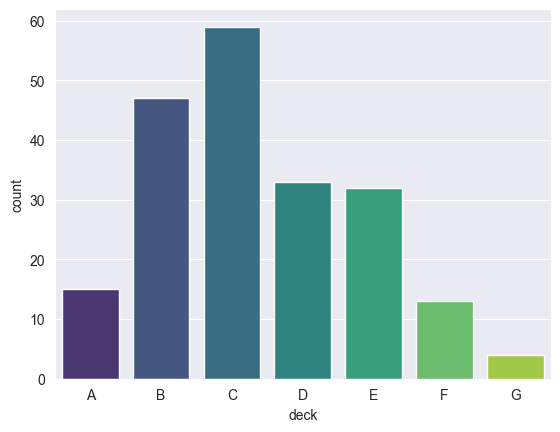

In [213]:
sns.set_style("darkgrid")
sns.countplot(data = df, x = "deck", palette = "viridis")
plt.show()

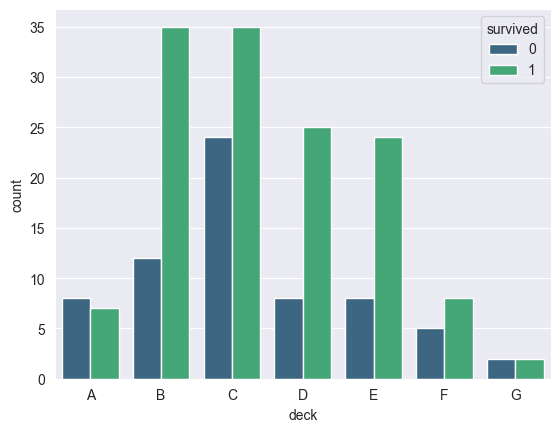

In [214]:
sns.set_style("darkgrid")
sns.countplot(data = df, x = "deck", hue = "survived", palette = "viridis")
plt.show()

##### Note: Since the 'deck' column contains too many missing values, we better drop it.

In [215]:
df.drop(["deck"], axis = 1, inplace = True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


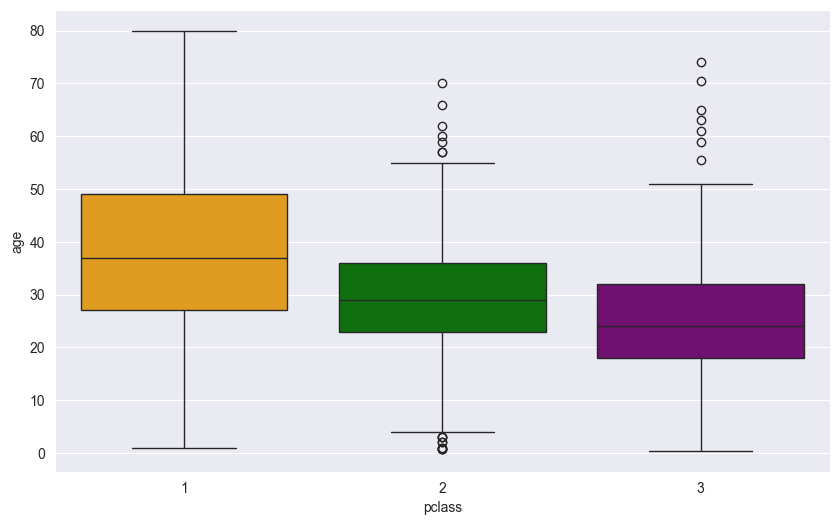

In [216]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = "pclass", y = "age", palette = ["orange", "green", "purple"])
plt.show()

##### Note: Let's handle the missing values in the 'age' column based on the 'pclass' variable, as there is a relationship betweent them.

In [217]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]

    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
        
    else:
        return age

df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)

null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

pd.DataFrame(data = null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


##### Note: since there are only two values missing in the 'embark_town' column, we can drop two rows.

In [218]:
df.dropna(inplace = True)

null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

pd.DataFrame(data = null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


##### Alright! Now our data doesn't have any missing values naymore.

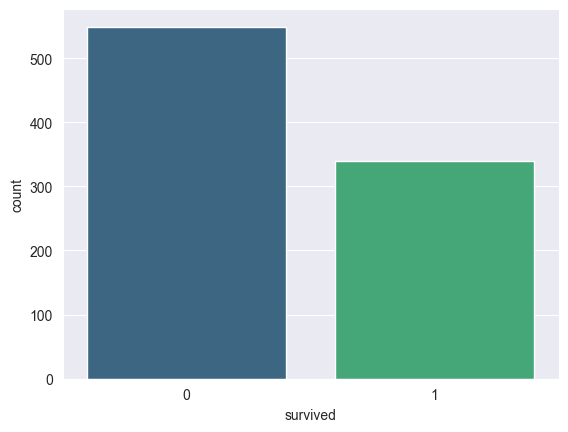

In [219]:
sns.countplot(data = df, x = "survived", palette = "viridis")
plt.show()

In [220]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

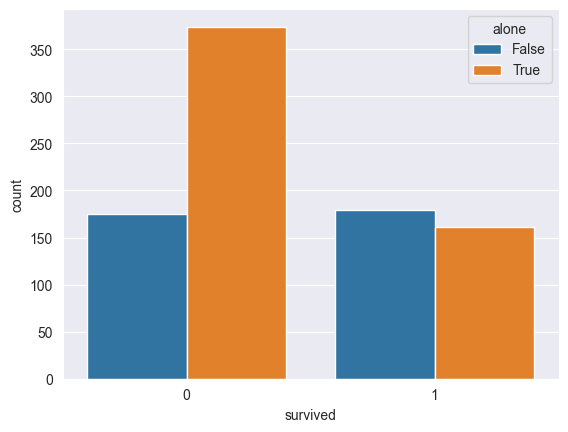

In [221]:
sns.countplot(data = df, x = "survived", hue = "alone")
plt.show()

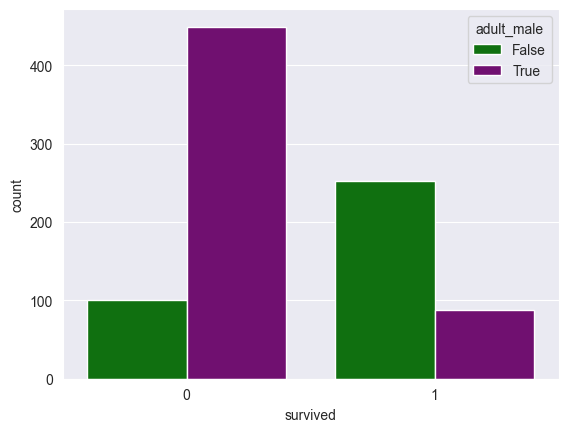

In [222]:
sns.countplot(data = df, x = "survived", hue = "adult_male", palette = ["green", "purple"])
plt.show()

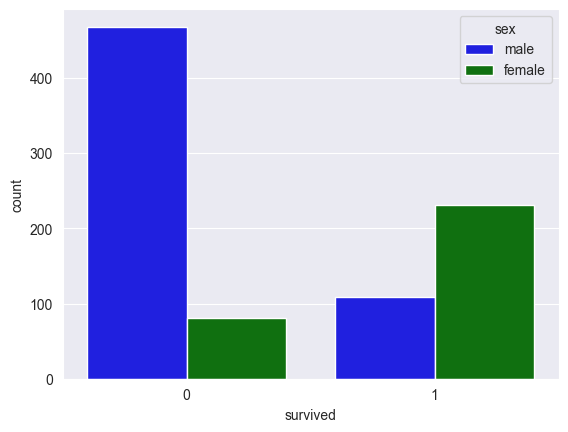

In [223]:
sns.countplot(data = df, x = "survived", hue = "sex", palette = ["blue", "green"])
plt.show()

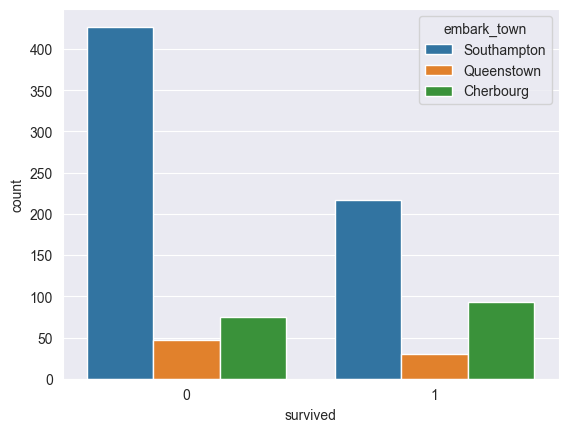

In [224]:
sns.countplot(data = df, x = "survived", hue = "embark_town")
plt.show()

<Figure size 1000x600 with 0 Axes>

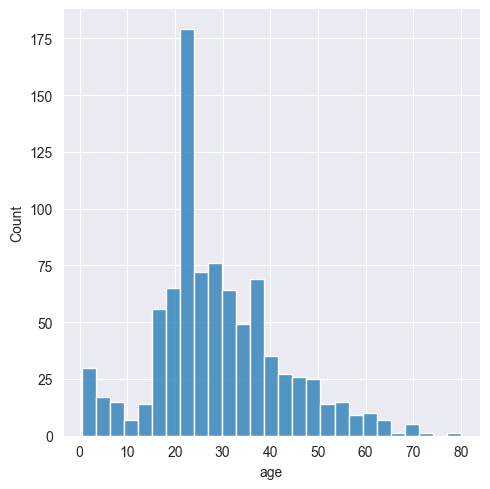

In [225]:
plt.figure(figsize = (10, 6))
sns.displot(data = df, x = "age")
plt.show()

<Figure size 1500x600 with 0 Axes>

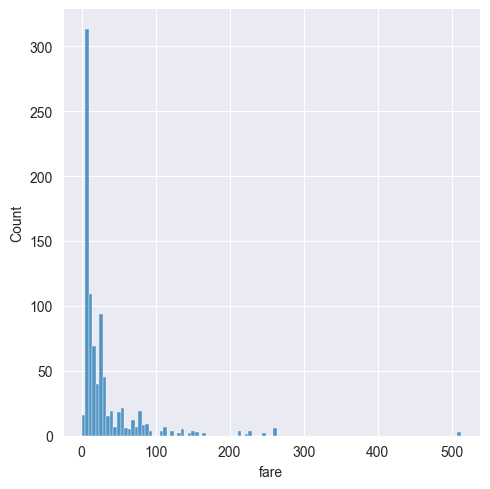

In [226]:
plt.figure(figsize = (15, 6))
sns.displot(data = df, x = "fare")
plt.show()

## Heatmap of the correlation matrix

In [227]:
new_df = df.copy()
new_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


In [228]:
new_df.drop([ "embark_town"], axis = 1, inplace = True)

In [229]:
new_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,man,True,False
1,1,1,female,38.0,1,0,71.2833,woman,False,False
2,1,3,female,26.0,0,0,7.9250,woman,False,True
3,1,1,female,35.0,1,0,53.1000,woman,False,False
4,0,3,male,35.0,0,0,8.0500,man,True,True


In [230]:
new_df.drop(["sex", "who"], axis = 1, inplace = True)

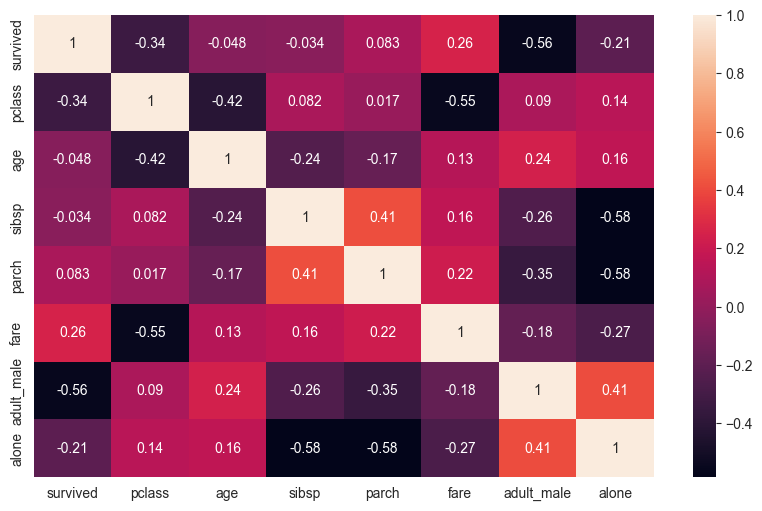

In [231]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = new_df.corr(), annot = True)
plt.show()

##### As we can see in the heatmap, variables 'age', 'sibsp', and 'parch' have only minor effect on the survival. So, let's remove them. 

In [232]:
df.drop(["age", "sibsp", "parch"], axis = 1, inplace = True)
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


### Now let's handle our categorical variables and convert them into numeric values

In [233]:
sex = pd.get_dummies(df["sex"], drop_first = True).astype(int)
who = pd.get_dummies(df["who"], drop_first = True).astype(int)
adult_male = pd.get_dummies(df["embark_town"], drop_first = True).astype(int)
embark_town = pd.get_dummies(df["embark_town"], drop_first = True).astype(int)
alone = pd.get_dummies(df["alone"], drop_first = True).astype(int)

In [234]:
df = pd.concat([df, sex, who, adult_male, embark_town, alone], axis = 1)

In [235]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,Queenstown,Southampton,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,Southampton,False,1,1,0,0,1,0,1,0
1,1,1,female,71.2833,woman,False,Cherbourg,False,0,0,1,0,0,0,0,0
2,1,3,female,7.9250,woman,False,Southampton,True,0,0,1,0,1,0,1,1
3,1,1,female,53.1000,woman,False,Southampton,False,0,0,1,0,1,0,1,0
4,0,3,male,8.0500,man,True,Southampton,True,1,1,0,0,1,0,1,1


In [236]:
df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1, inplace = True)


In [237]:
df.head()

,survived,pclass,fare,male,man,woman,Queenstown,Southampton,Queenstown,Southampton,True
0,0,3,7.2500,1,1,0,0,1,0,1,0
1,1,1,71.2833,0,0,1,0,0,0,0,0
2,1,3,7.9250,0,0,1,0,1,0,1,1
3,1,1,53.1000,0,0,1,0,1,0,1,0
4,0,3,8.0500,1,1,0,0,1,0,1,1


In [238]:
df1 = df.copy()

In [239]:
df.head()

,survived,pclass,fare,male,man,woman,Queenstown,Southampton,Queenstown,Southampton,True
0,0,3,7.2500,1,1,0,0,1,0,1,0
1,1,1,71.2833,0,0,1,0,0,0,0,0
2,1,3,7.9250,0,0,1,0,1,0,1,1
3,1,1,53.1000,0,0,1,0,1,0,1,0
4,0,3,8.0500,1,1,0,0,1,0,1,1


## 5. Modelling

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = df.drop(["survived"], axis = 1)
y = df["survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

model = LogisticRegression()

# Ensure all column names are strings
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# Try fitting the model again
model.fit(x_train, y_train)


LogisticRegression()

## 6. Model Evaluation

In [242]:
y_preds = model.predict(x_test)

In [243]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       141
           1       0.68      0.79      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.79       223



In [244]:
cnf_matrix = confusion_matrix(y_test, y_preds)
cnf_matrix

array([[111,  30],
       [ 17,  65]], dtype=int64)